In [5]:
from kaggle_environments import make
import json

In [10]:
# 12x12: seed 562124211
# 32x32: seed 562124210
# 'episodeSteps':5
#env = make("lux_ai_2021", configuration={"seed": 562124210, "loglevel": 2, "annotations": True}, debug=True)
env = make("lux_ai_2021", configuration={"loglevel": 2, "annotations": True}, debug=True)


# run a match between two agents
# current agents: simple, do_nothing, working_title, imitation_learning
agent0 = 'working_title'
agent1 = 'imitation_learning'

# steps = env.run(["./%s/agent.py" % agent0, "./%s/agent.py" % agent1])
# steps = env.run(['./rl_agent/main.py', './working_title/agent.py'])
steps = env.run(["agent.py", "./working_title/agent.py"])
#steps = env.run(["./imitation_learning/agent.py", "./working_title/agent.py"])
# steps = env.run(["./rl_agent/main.py", "./rl_agent/main.py"])

SyntaxError: invalid syntax (3014605493.py, line 5)

In [7]:

env.render(mode="ipython", width=980, height=800)

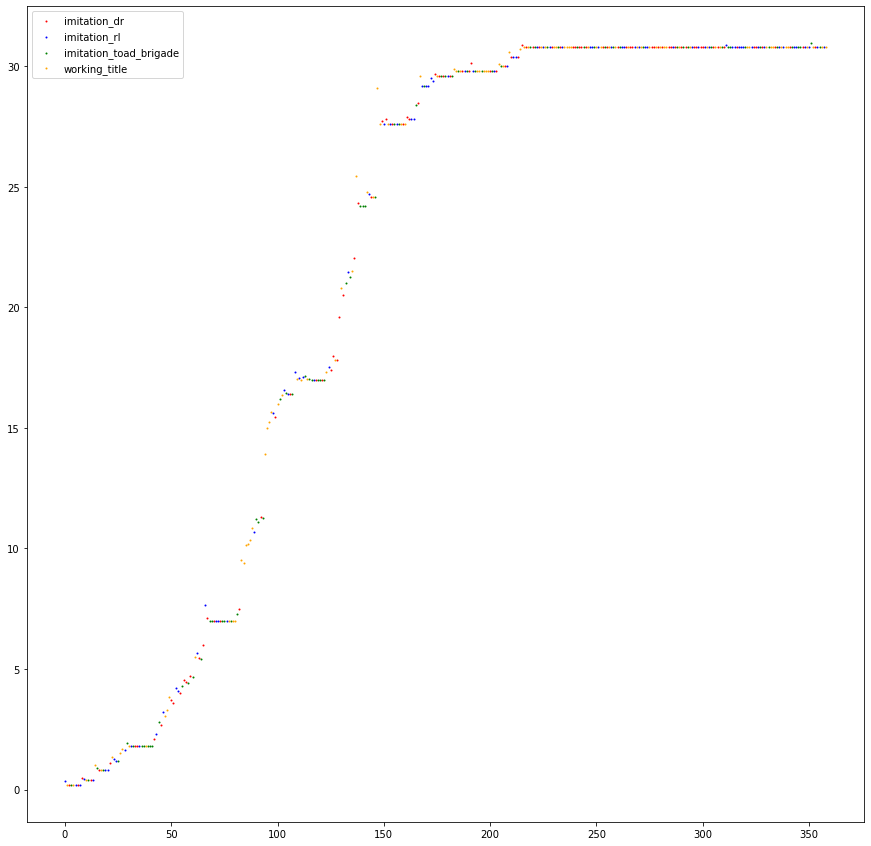

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('chosen_agent.log', names=['agent', 'raw_reward', 'scaled_reward'], skiprows=2)

color_dict = {2:['red', 'blue'],
              3:['red', 'blue', 'green'],
              4:['red', 'blue', 'green', 'orange'],
              5:['red', 'blue', 'green', 'orange', 'yellow']}

colors = color_dict[df['agent'].nunique()]


plt.figure(figsize=(15,15))
for (name, group), color in zip(df.groupby(['agent']), colors):
    plt.scatter(group.index, group['raw_reward'], s=1, c=color, label=name)
plt.legend()


In [5]:
df

agent  raw_reward  scaled_reward
0    imitation_toad_brigade      0.3525       0.027411
1             working_title      0.2000       0.015314
2             working_title      0.2000       0.015314
3    imitation_toad_brigade      0.2000       0.015314
4             working_title      0.2000       0.015314
..                      ...         ...            ...
354            imitation_rl     15.6000       0.312751
355            imitation_dr     15.6000       0.312751
356            imitation_rl     15.6000       0.312751
357  imitation_toad_brigade     15.6000       0.312751
358  imitation_toad_brigade     15.6000       0.312751

[359 rows x 3 columns]

In [6]:
with open('chosen_agent.log', 'r') as f:
    algo = f.readline().rstrip()
    agents = f.readline().rstrip()
print('Online learning algo: ', algo)
print('Agents: ', agents)
print('\nValue counts:')
print(df['agent'].value_counts())
print('Max raw reward: ', df['raw_reward'].max())

Online learning algo:  EXP3
Agents:  working_title,imitation_toad_brigade,imitation_dr,imitation_rl

Value counts:
imitation_dr              103
imitation_toad_brigade    102
imitation_rl               94
working_title              60
Name: agent, dtype: int64
Max raw reward:  15.8


In [7]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


In [8]:
raise

RuntimeError: No active exception to reraise

In [9]:
# save replay
replay = env.toJSON()
with open("replay.json", "w") as f:
    json.dump(replay, f)

In [ ]:
# to create .tar.gz submission (edit first line to cd into folder/agent to submit):

!tar -czf submission.tar.gz main.py agent.py reward.py rl_agent imitation_learning working_title kaban __init__.py